In [177]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Carga de Datos y Slicing

In [178]:
###función para cargar los datos y generar el dataframe ya revuelto usando Pandas
def CargaDatos():
    TrainingData = np.load('proyecto_training_data.npy')
    DataRegression = pd.DataFrame(TrainingData,columns =['SalePrice','OveralQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
    DataRegression = DataRegression.sample(frac = 1, ignore_index=True)
    DataTrain = DataRegression.iloc[0:int(len(DataRegression)*.8),:]
    DataTest = DataRegression.iloc[int(len(DataRegression)*0.8):len(DataRegression), : ]
    

    return DataRegression, DataTrain, DataTest

In [179]:
## Main del programa
DatosProyecto, DatosEntreno, DatosPruebas = CargaDatos() #carga los datos completos, el 80% para entrenamiento y el 20% para pruebas
# Se generan 3 Data Frame, uno con los datos totales, otro con los de entreno y otro con los de pruebas.


In [180]:
pd.DataFrame.describe(DatosEntreno)

,SalePrice,OveralQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,959.000000
mean,180874.948630,6.109589,1166.952911,6.483733,1971.545377,69.554745
std,77638.973819,1.371135,386.360156,1.619211,30.469078,24.414840
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130000.000000,5.000000,892.000000,5.000000,1954.000000,59.000000
50%,163500.000000,6.000000,1088.000000,6.000000,1974.000000,68.000000
75%,215000.000000,7.000000,1412.500000,7.000000,2001.000000,80.000000
max,625000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Histograma de la variable

<Figure size 640x480 with 0 Axes>

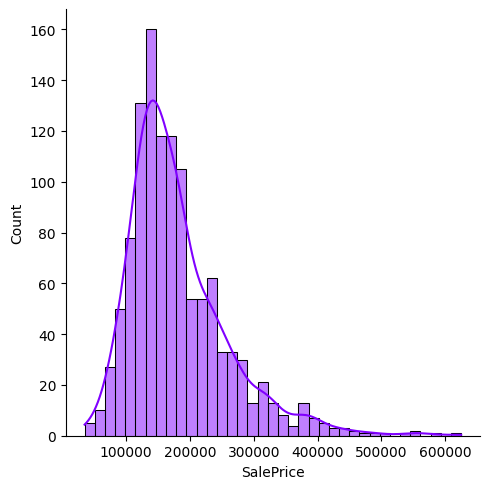

<Figure size 640x480 with 0 Axes>

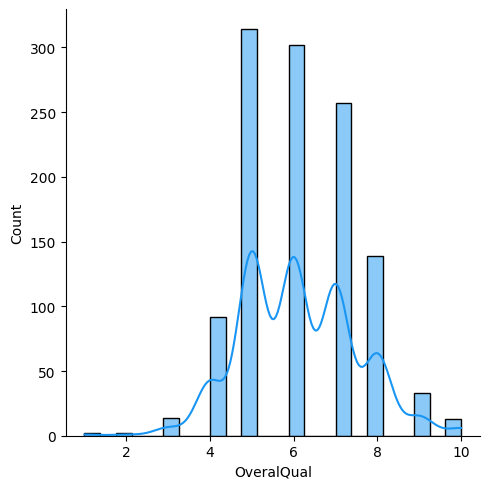

<Figure size 640x480 with 0 Axes>

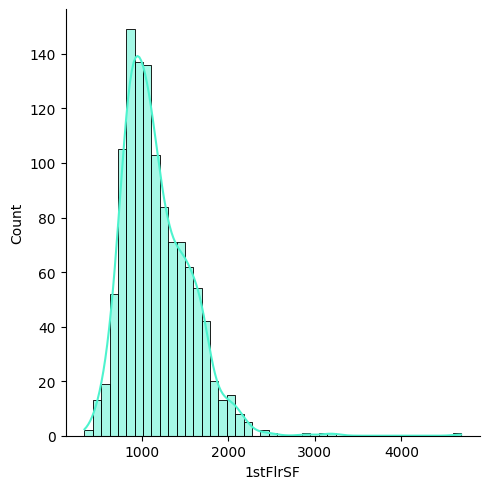

<Figure size 640x480 with 0 Axes>

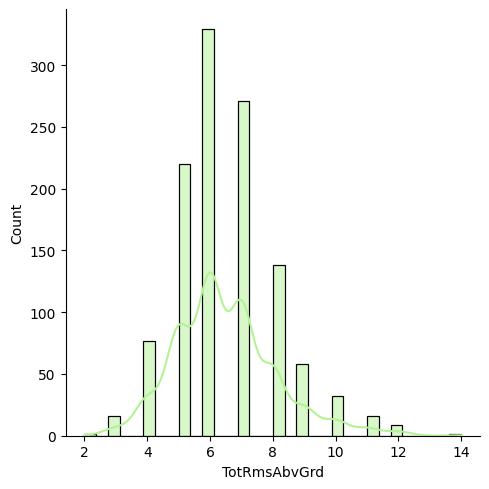

<Figure size 640x480 with 0 Axes>

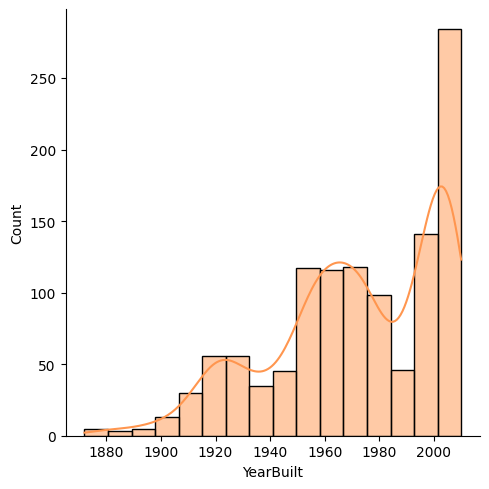

<Figure size 640x480 with 0 Axes>

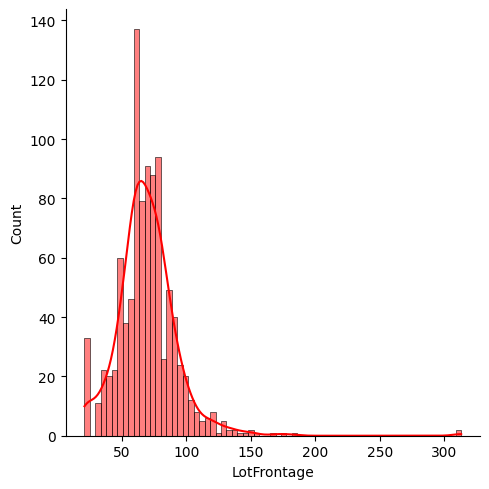

In [181]:
ColorHist = cm.rainbow(np.linspace(0,1,(DatosEntreno.shape[1])))

Ban = 0
for column in DatosEntreno:
    plt.figure()
    sb.displot(DatosEntreno[column], kde = True, color = ColorHist[Ban])
    Ban = Ban + 1

## Calcular el coeficiente de correlación de cada variable


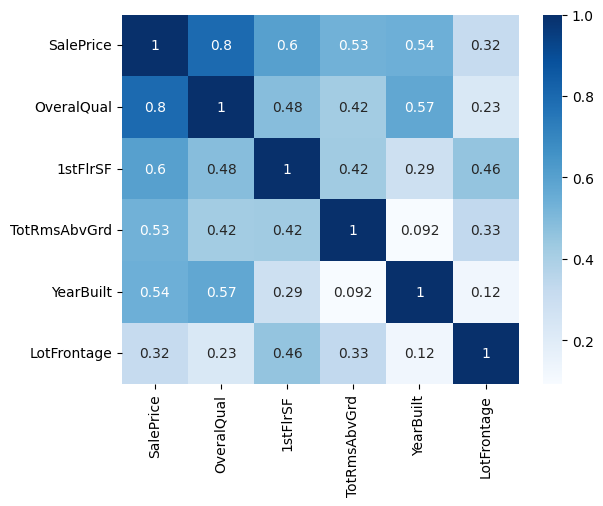

In [182]:
plt.figure()
correlacones = DatosEntreno.corr()
GrafiCorr = sb.heatmap(correlacones, annot = True, cmap = 'Blues',fmt = '0.2g')

## Scatterplot con Correlación como título

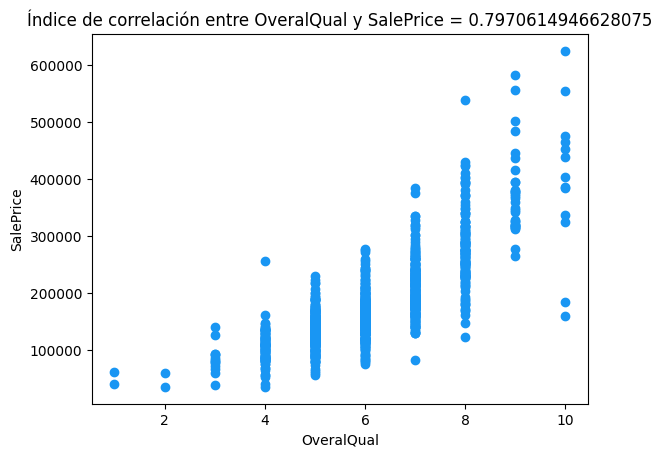

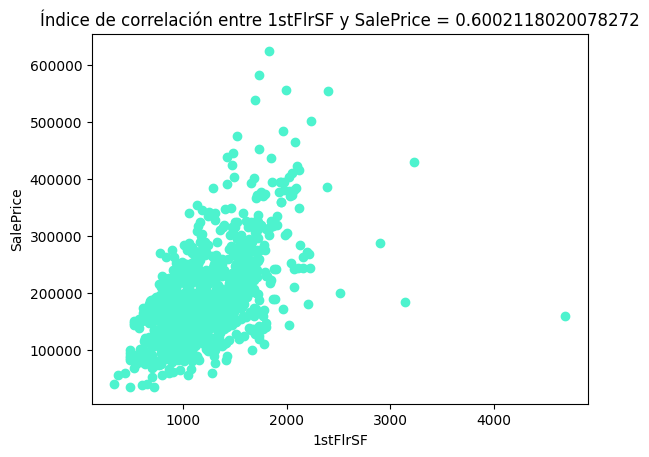

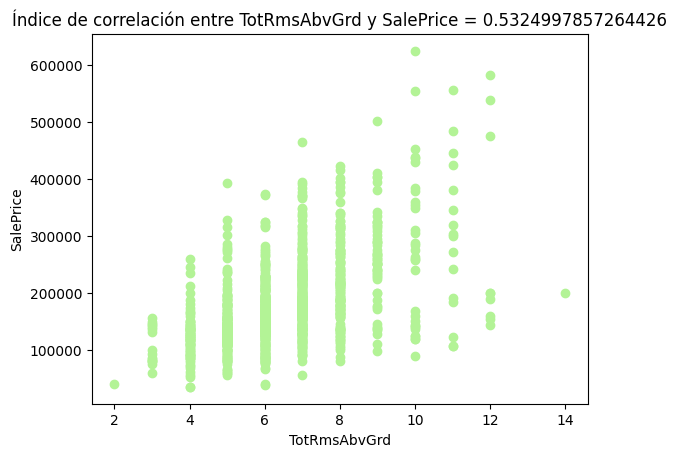

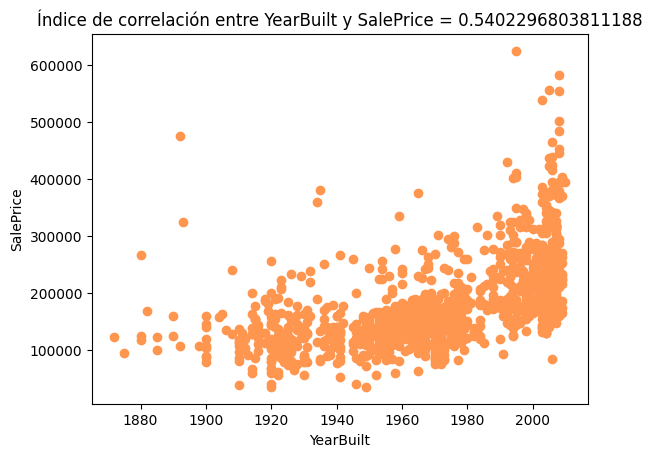

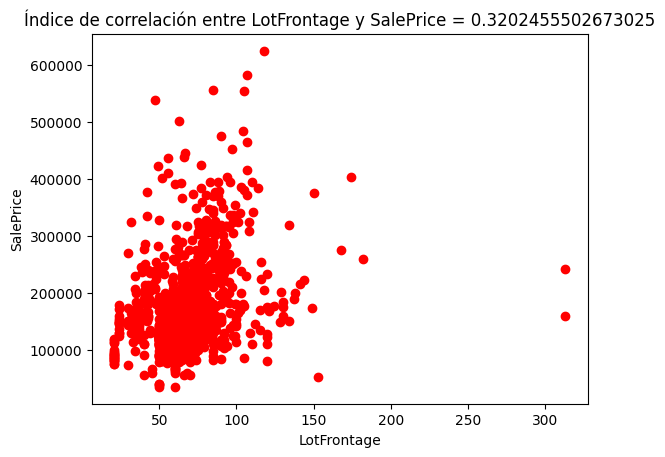

In [183]:
CorrPrecio = DatosEntreno.corr()['SalePrice']
colores = cm.rainbow(np.linspace(0,1,len(CorrPrecio)))
Bandera = 0
for value in DatosEntreno:
    if value != 'SalePrice':
        Bandera = Bandera + 1
        plt.figure()
        plt.title(f'Índice de correlación entre {value} y SalePrice = {CorrPrecio[Bandera]}')
        plt.xlabel(value)
        plt.ylabel('SalePrice')
        plt.scatter(DatosEntreno[value],DatosEntreno['SalePrice'], color = colores[Bandera])

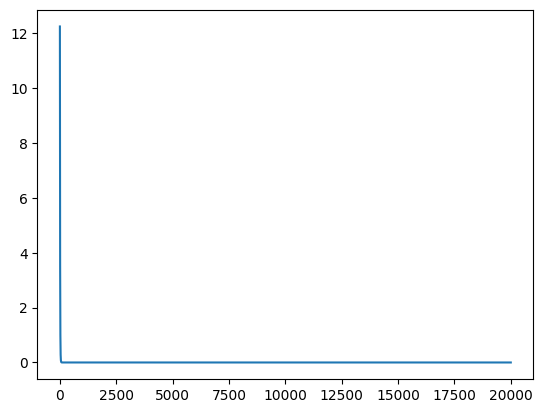

In [234]:
#### funcion para el construir el modelo

beta1 = 0.1
beta0 = 0.1
LearningRate = 0.01
yOriginal = np.array([3,5,7]).reshape(-1,1)
errorvec = []
x = np.array([1,2,3]).reshape(-1,1)
ones = np.ones_like(x)
ones = ones.reshape(-1,1)
Vec = np.hstack([x,ones])
betas = np.array([beta1,beta0]).reshape(-1,1)
for index in range (20000):
    result = np.dot(Vec,betas)
    error = 0.5*np.mean(np.power((result-yOriginal),2))
    DelBeta1 = np.mean((result - yOriginal)*x)
    DelBeta0 = np.mean(result - yOriginal)
    beta1 = beta1 - LearningRate*DelBeta1
    beta0 = beta0 - LearningRate*DelBeta0
    betas = np.array([beta1,beta0]).reshape(-1,1)
    errorvec.append(error)
plt.plot(errorvec)


## Clase para modelo

In [186]:
class RegreLin():
    def __init__(self, epochs, LearnRate, x, y, print_itr):
        self.epochs = epochs
        self.LearningRate = LearnRate
        self.x = x
        self.y = y
        self.print_iters = print_itr
        self.betas = []
